In [168]:
# importing required libraries

import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

### Loading the Dataset

In [33]:
# reading the csv file and assigning it to a variable

USA_Housing = pd.read_csv("datasets/USA_Housing - USA_Housing.csv")

In [34]:
# loading the dataset

USA_Housing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [35]:
# getting information about the dataset

USA_Housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [40]:
# getting a description of the dataset

USA_Housing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562390,5.322283,6.299250,3.140000,29403.928700,9.975771e+05
50%,68804.286405,5.970429,7.002902,4.050000,36199.406690,1.232669e+06
75%,75783.338665,6.650808,7.665871,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


In [42]:
# checking for empty fields in the dataset

USA_Housing.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

since there is no empty field in the dataset, we proceed further

### Exploratory Data Analysis (EDA)

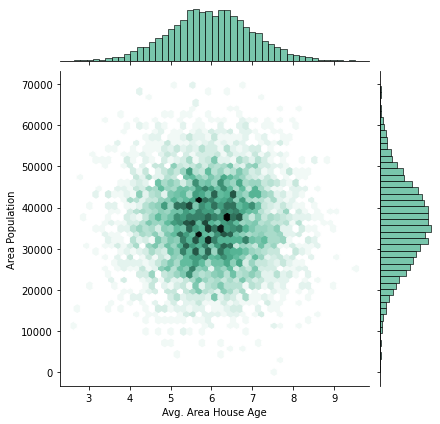

In [44]:
# Using a jointplot to create a 2D hex bin plot comparing Avg. Area House Age and Area Population

sns.jointplot(x = "Avg. Area House Age", y = "Area Population", data = USA_Housing, kind = "hex", color = "#4CB391")

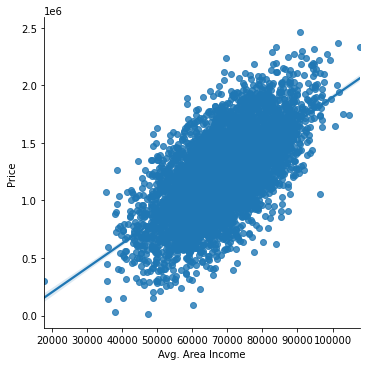

In [46]:
# using seaborn's lmplot to create a linear model plot of Avg. Area Income and Price.

sns.lmplot(x = "Avg. Area Income", y = "Price", data = USA_Housing)

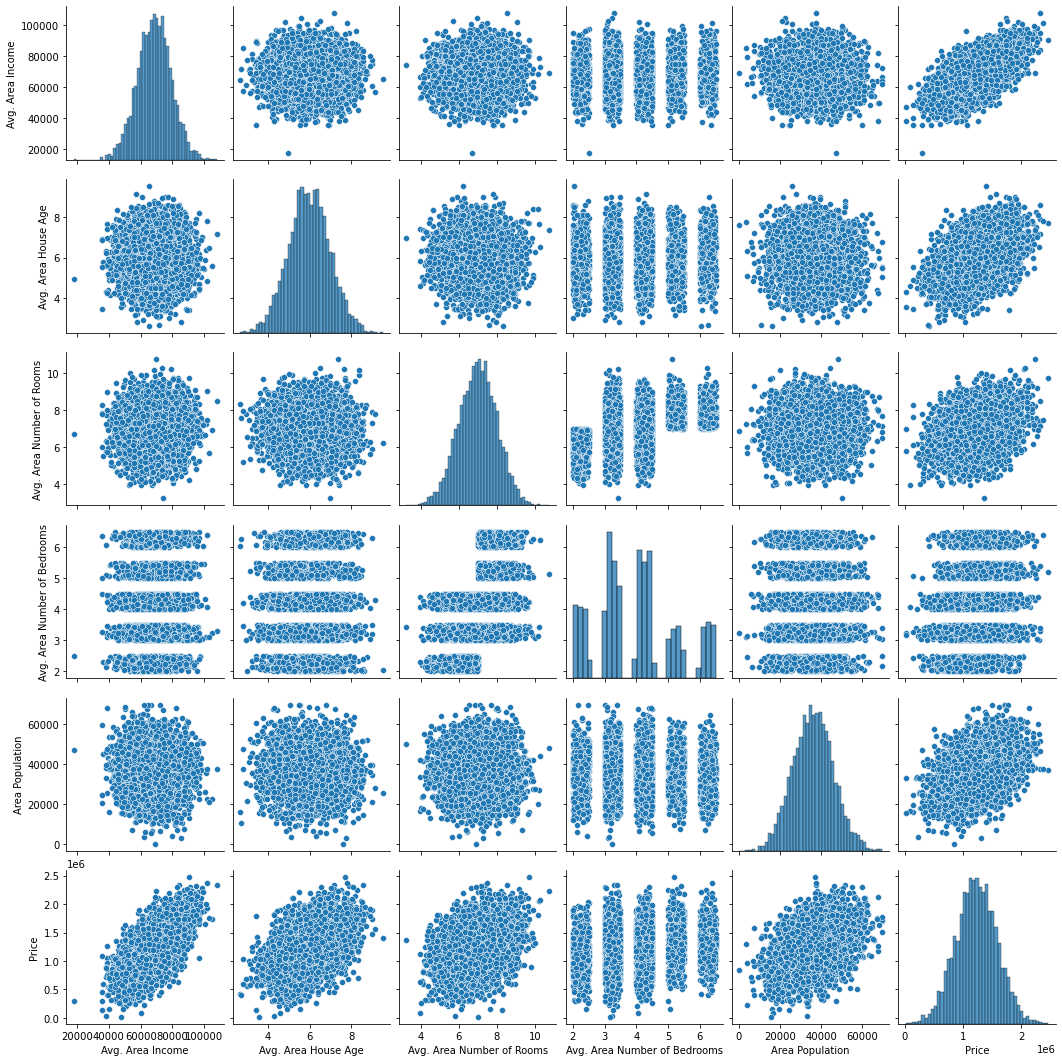

In [66]:
# using seaborn's pairplot

sns.pairplot(USA_Housing)

### Scaling

In [120]:
# carrying out scaling on the dataset before splitting
# applying the Min Max Scaler technique using Fit Transform.

# retrieving just the numeric input values
data = USA_Housing.values[:, : -1]

# performing a robust scaler transform of the dataset
trans = MinMaxScaler()
data = trans.fit_transform(data)

# convering the array back to a dataframe
scaled_dataset = pd.DataFrame(data, columns = ["Avg. Area Income", "Avg. Area House Age", "Avg. Area Number of Rooms", "Avg. Area Number of Bedrooms", "Area Population", "Price"])

In [122]:
# loading the scaled dataset
scaled_dataset

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,0.686822,0.441986,0.501502,0.464444,0.329942,0.425210
1,0.683521,0.488538,0.464501,0.242222,0.575968,0.607369
2,0.483737,0.468609,0.701350,0.695556,0.528582,0.425192
3,0.506630,0.660956,0.312430,0.280000,0.491549,0.507384
4,0.469223,0.348556,0.611851,0.495556,0.376988,0.250702
...,...,...,...,...,...,...
4995,0.475738,0.754359,0.385619,0.324444,0.326351,0.425683
4996,0.675097,0.633450,0.444024,0.448889,0.366362,0.597881
4997,0.507135,0.670026,0.208534,0.028889,0.476515,0.413672
4998,0.558419,0.420389,0.517579,0.764444,0.611282,0.482127


We can see that the distributions have been adjusted and that the minimum and maximum values for each variable are now a crisp 0.0 and 1.0 respectively.

In [124]:
# summarizing the dataset

scaled_dataset.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.564890,0.484803,0.498658,0.440296,0.518234,0.495748
std,0.118547,0.144216,0.133694,0.274253,0.142920,0.143946
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.485889,0.389536,0.407138,0.253333,0.420903,0.400158
50%,0.567350,0.483815,0.500666,0.455556,0.518751,0.495992
75%,0.644977,0.582783,0.588787,0.553333,0.614676,0.593231
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


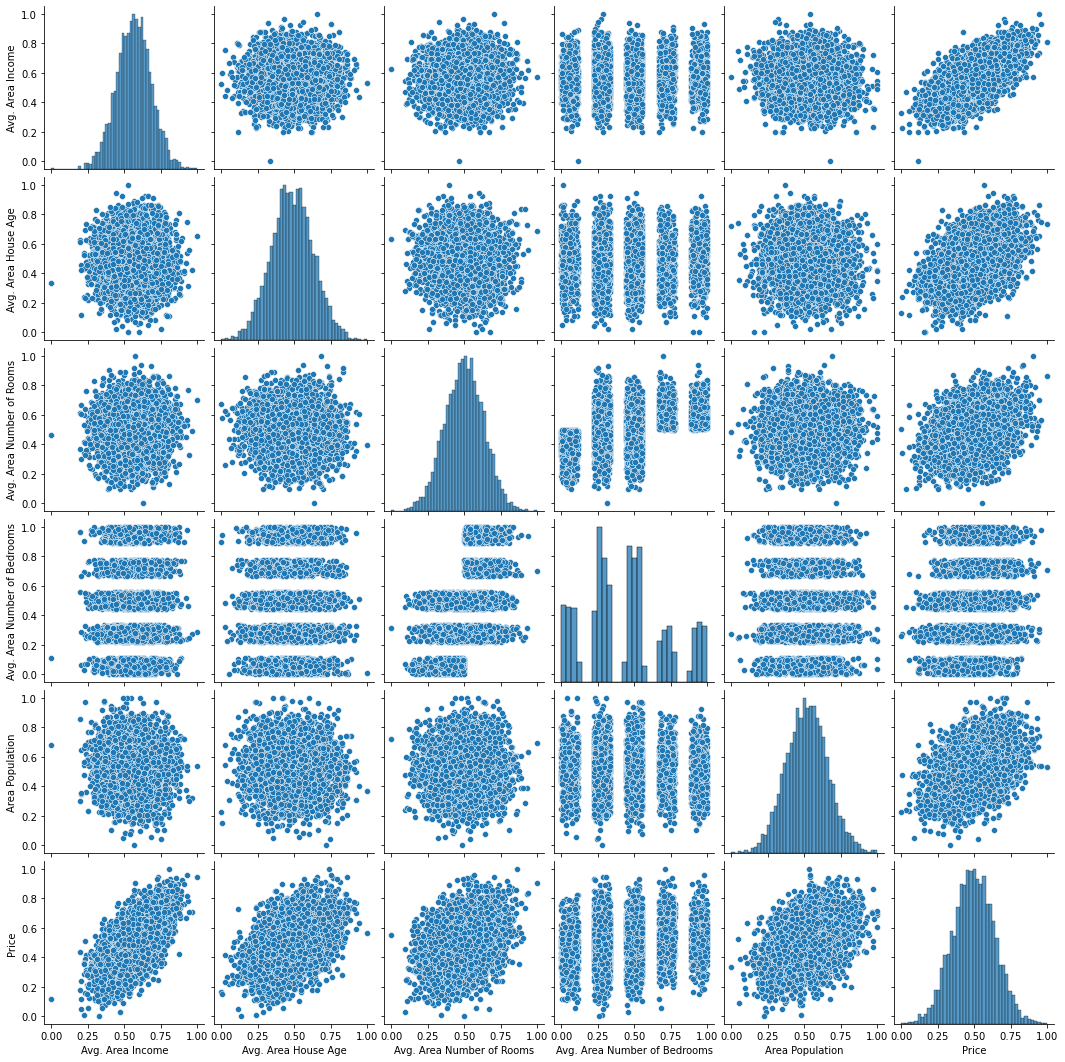

In [125]:
# using seaborn's pairplot on the scaled dataset

sns.pairplot(scaled_dataset)

As you can see, the pairplot don’t look different from their original distributions seen in the previous section.

### Training & Testing Data

In [126]:
# defining the dependent and independent variables
X = scaled_dataset.iloc[:, :-1].values
y = scaled_dataset.iloc[:, -1].values

In [127]:
# splitting the scaled_dataset into the Training set and Test set using train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 101)

In [129]:
# fitting our Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [160]:
# predicting the Test set results
y_test_pred = regressor.predict(X_test)

In [161]:
# printing the intercept of the trained model
print('Intercept: \n', regressor.intercept_)

Intercept: 
 -0.5845089336763203


In [162]:
# printing the coefficients of the trained model
print('Coefficients: \n', regressor.coef_)

Coefficients: 
 [0.78899388 0.46207838 0.37528748 0.00409767 0.42891505]


In [163]:
# Dataframe showing the coefficient of the independent variables
independent_varaible_coeff_df = pd.DataFrame (regressor.coef_, columns = ["Coefficient"], index = ["Avg. Area Income", "Avg. Area House Age", "Avg. Area Number of Rooms", "Avg. Area Number of Bedrooms", "Area Population"])

In [164]:
# loading the independent_varaible_coeff_df
independent_varaible_coeff_df

,Coefficient
Avg. Area Income,0.788994
Avg. Area House Age,0.462078
Avg. Area Number of Rooms,0.375287
Avg. Area Number of Bedrooms,0.004098
Area Population,0.428915


In [175]:
# showing the output of the model prediction by loading the "y_test_pred" results
y_test_pred

array([0.50752451, 0.33086347, 0.70378852, ..., 0.14522394, 0.55002392,
       0.77394319])